In [5]:
# Exponential Biased Quantum Galton Box Simulation
# --------------------------------------------------
# This notebook simulates a Galton board using a quantum circuit with biased coin flips.
# The bias is introduced via RY rotations to model an exponential-like distribution.
# --------------------------------------------------

# Standard libraries imports
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# For Jupyter notebooks (optional magic)
%matplotlib inline

def create_exponential_galton_box(layers=5, theta=np.pi/6):
    """
    Constructs a quantum Galton board circuit using biased RY rotations.

    Parameters:
        layers (int): Number of steps or layers in the Galton box.
        theta (float): Biasing angle for the RY rotation gate.

    Returns:
        QuantumCircuit: Configured quantum circuit representing the biased Galton box.
    """
    n_qubits = layers
    qc = QuantumCircuit(n_qubits, n_qubits)

    # Apply biased coin flips (RY rotations)
    for i in range(n_qubits):
        qc.ry(theta, i)

    # Apply entangling CNOTs to simulate Galton board peg deflections
    for i in range(n_qubits - 1):
        qc.cx(i, i + 1)

    # Measure all qubits
    qc.measure(range(n_qubits), range(n_qubits))
    return qc

def simulate_distribution(qc, shots=2048):
    """
    Runs the quantum circuit and returns the output counts.

    Parameters:
        qc (QuantumCircuit): The quantum circuit to simulate.
        shots (int): Number of repetitions for sampling.

    Returns:
        dict: Dictionary containing result counts for each bitstring.
    """
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=shots).result()
    return result.get_counts()

def plot_distribution(counts, title="Exponential Quantum Walk"):
    """
    Visualizes the output distribution from the simulation.

    Parameters:
        counts (dict): Output measurement counts.
        title (str): Title for the histogram plot.
    """
    plot_histogram(counts, title=title, bar_labels=False)
    plt.show()

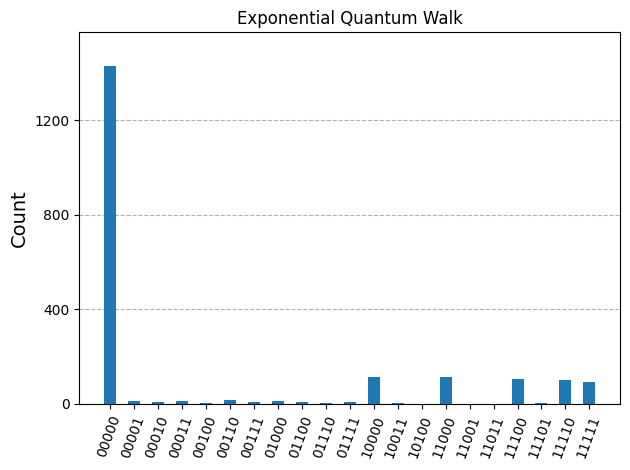

In [6]:
# Generate and simulate exponential biased quantum walk
if __name__== "__main__":
    layers = 5
    theta = np.pi / 6  # Bias angle for exponential behavior

    qc = create_exponential_galton_box(layers=layers, theta=theta)
    counts = simulate_distribution(qc)
    plot_distribution(counts)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/biased_quantum_walk_exponential_fit.png'

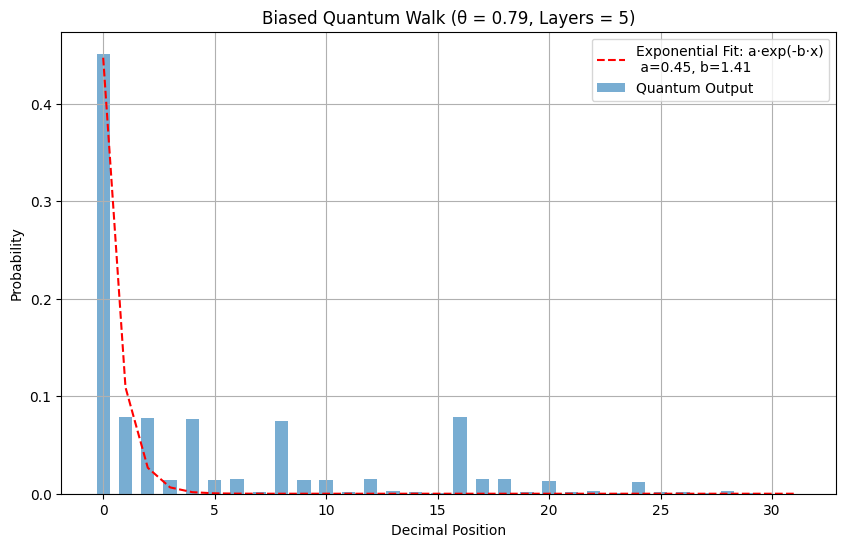

In [7]:
# Task 7: Biased Quantum Walk – Exponential Distribution
# -------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import AerSimulator

# -------------------------------------------------------
# Step 1: Exponential function for curve fitting
# -------------------------------------------------------
def exponential_func(x, a, b):
    """Exponential function: a * exp(-b * x)"""
    return a * np.exp(-b * x)

# -------------------------------------------------------
# Step 2: Biased Quantum Walk Circuit using Ry gates
# -------------------------------------------------------
def build_biased_quantum_walk(n_layers, theta=np.pi/4):
    """
    Construct a biased quantum walk circuit using Ry(θ) gates
    to simulate an exponential distribution.
    """
    qr = QuantumRegister(n_layers)
    cr = ClassicalRegister(n_layers)
    qc = QuantumCircuit(qr, cr)

    for i in range(n_layers):
        qc.ry(theta, qr[i])

    qc.barrier()
    qc.measure(qr, cr)

    return qc

# -------------------------------------------------------
# Step 3: Run simulation
# -------------------------------------------------------
def run_simulation(n_layers, theta=np.pi/4, shots=8192):
    """
    Run the biased quantum walk circuit on AerSimulator and return measurement counts.
    """
    qc = build_biased_quantum_walk(n_layers, theta)
    simulator = AerSimulator()
    transpiled = transpile(qc, simulator)
    result = simulator.run(transpiled, shots=shots).result()
    counts = result.get_counts()
    return counts

# -------------------------------------------------------
# Step 4: Convert counts to sorted arrays
# -------------------------------------------------------
def counts_to_sorted_arrays(counts):
    """
    Convert bitstring-based counts to sorted arrays of decimal positions and probabilities.
    """
    x = np.array([int(k, 2) for k in counts.keys()])
    y = np.array([v for v in counts.values()])
    sorted_indices = np.argsort(x)
    return x[sorted_indices], y[sorted_indices] / np.sum(y)

# -------------------------------------------------------
# Step 5: Plot histogram with exponential fit
# -------------------------------------------------------
def plot_exponential_fit(counts, n_layers, theta, shots):
    """
    Plot the quantum histogram and overlay an exponential fit curve.
    """
    x, y = counts_to_sorted_arrays(counts)

    # Fit exponential function to data
    try:
        popt, _ = curve_fit(exponential_func, x, y, p0=(1.0, 0.1))
        fitted_y = exponential_func(x, *popt)
        label = f'Exponential Fit: a·exp(-b·x)\n a={popt[0]:.2f}, b={popt[1]:.2f}'
    except RuntimeError:
        fitted_y = None
        label = "Exponential Fit Failed"

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(x, y, width=0.6, alpha=0.6, label="Quantum Output")
    if fitted_y is not None:
        plt.plot(x, fitted_y, 'r--', label=label)

    plt.xlabel("Decimal Position")
    plt.ylabel("Probability")
    plt.title(f"Biased Quantum Walk (θ = {theta:.2f}, Layers = {n_layers})")
    plt.legend()
    plt.grid(True)

    # Save the figure
    save_path = "/mnt/data/biased_quantum_walk_exponential_fit.png"
    plt.savefig(save_path)
    print(f"[✓] Plot saved to: {save_path}")

    plt.show()

# -------------------------------------------------------
# Final call to simulate and plot
# -------------------------------------------------------
# You can adjust `theta` and `n_layers` to change the shape.
steps = 5
theta = np.pi / 4   # Biased angle; try np.pi/6 for stronger bias
shots = 8192

counts = run_simulation(n_layers=steps, theta=theta, shots=shots)
plot_exponential_fit(counts, n_layers=steps, theta=theta, shots=shots)


[•] Layers=2, KL=0.0005
[•] Layers=3, KL=0.0003
[•] Layers=4, KL=0.0031
[•] Layers=5, KL=0.0040
[•] Layers=6, KL=0.0073
[✓] Saved: /home/sarojray/Downloads/womanium2025/QuantumGaltonBox/results/task9_kl_vs_layers.png


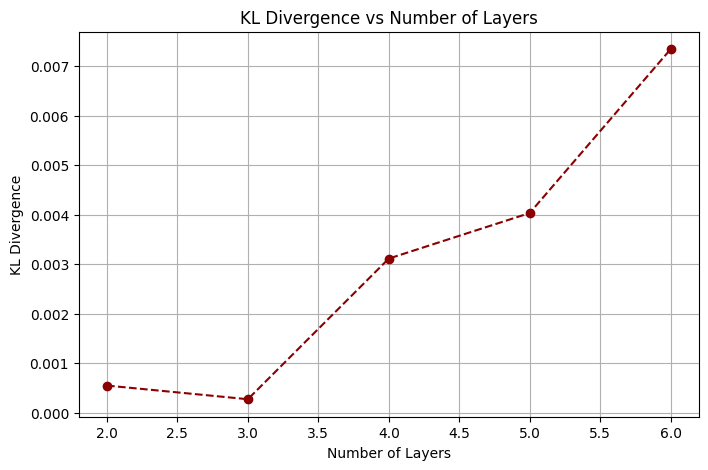

[•] L=2, θ=0.10 → KL=0.0042
[•] L=2, θ=0.31 → KL=0.0008
[•] L=2, θ=0.52 → KL=0.0003
[•] L=2, θ=0.73 → KL=0.0000
[•] L=2, θ=0.94 → KL=0.0004
[•] L=2, θ=1.15 → KL=0.0003
[•] L=2, θ=1.36 → KL=0.0005
[•] L=2, θ=1.57 → KL=0.0009
[•] L=3, θ=0.10 → KL=0.0082
[•] L=3, θ=0.31 → KL=0.0032
[•] L=3, θ=0.52 → KL=0.0008
[•] L=3, θ=0.73 → KL=0.0007
[•] L=3, θ=0.94 → KL=0.0012
[•] L=3, θ=1.15 → KL=0.0009
[•] L=3, θ=1.36 → KL=0.0009
[•] L=3, θ=1.57 → KL=0.0010
[•] L=4, θ=0.10 → KL=0.0142
[•] L=4, θ=0.31 → KL=0.0035
[•] L=4, θ=0.52 → KL=0.0035
[•] L=4, θ=0.73 → KL=0.0020
[•] L=4, θ=0.94 → KL=0.0029
[•] L=4, θ=1.15 → KL=0.0016
[•] L=4, θ=1.36 → KL=0.0029
[•] L=4, θ=1.57 → KL=0.0025
[•] L=5, θ=0.10 → KL=0.0131
[•] L=5, θ=0.31 → KL=0.0022
[•] L=5, θ=0.52 → KL=0.0063
[•] L=5, θ=0.73 → KL=0.0068
[•] L=5, θ=0.94 → KL=0.0037
[•] L=5, θ=1.15 → KL=0.0037
[•] L=5, θ=1.36 → KL=0.0036
[•] L=5, θ=1.57 → KL=0.0020
[•] L=6, θ=0.10 → KL=0.0160
[•] L=6, θ=0.31 → KL=0.0097
[•] L=6, θ=0.52 → KL=0.0191
[•] L=6, θ=0.73 → KL

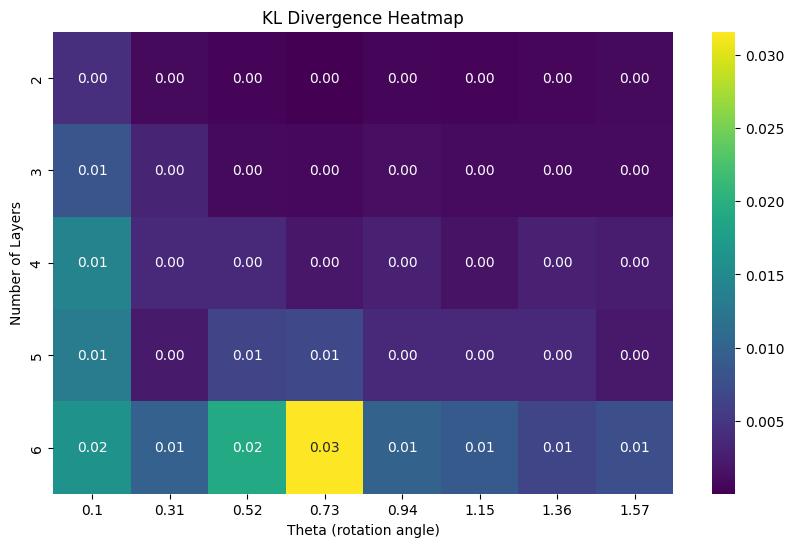

In [8]:
# Task 9: Statistical Distance vs Number of Layers and Theta
# --------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, thermal_relaxation_error

# ----------------------------------------------------------
# Quantum walk circuit with biased rotation
# ----------------------------------------------------------
def build_biased_quantum_walk(n_layers, theta):
    qr = QuantumRegister(n_layers)
    cr = ClassicalRegister(n_layers)
    qc = QuantumCircuit(qr, cr)

    for i in range(n_layers):
        qc.ry(theta, qr[i])

    qc.barrier()
    qc.measure(qr, cr)
    return qc

# ----------------------------------------------------------
# Noise model (same as Task 4c)
# ----------------------------------------------------------
def create_basic_noise_model():
    noise_model = NoiseModel()
    dep_error = depolarizing_error(0.01, 1)
    t1, t2, gate_time = 100e3, 80e3, 50
    thermal_error = thermal_relaxation_error(t1, t2, gate_time)

    noise_model.add_all_qubit_quantum_error(dep_error, ['ry'])
    noise_model.add_all_qubit_quantum_error(thermal_error, ['measure'])
    return noise_model

# ----------------------------------------------------------
# Simulate and convert counts to probs
# ----------------------------------------------------------
def simulate_distribution(n_layers, theta, shots=8192, noisy=False):
    qc = build_biased_quantum_walk(n_layers, theta)
    simulator = AerSimulator(noise_model=create_basic_noise_model()) if noisy else AerSimulator()
    transpiled = transpile(qc, simulator)
    result = simulator.run(transpiled, shots=shots).result()
    counts = result.get_counts()
    
    total = sum(counts.values())
    probs = np.zeros(2**n_layers)
    for bitstring, count in counts.items():
        index = int(bitstring, 2)
        probs[index] = count / total
    return probs

# ----------------------------------------------------------
# KL Divergence
# ----------------------------------------------------------
def kl_divergence(p, q, eps=1e-10):
    p += eps
    q += eps
    return entropy(p, q)

# ----------------------------------------------------------
# Plot 1: KL divergence vs Number of Layers
# ----------------------------------------------------------
def plot_kl_vs_layers(theta=np.pi/4, max_layers=7):
    layers = list(range(2, max_layers+1))
    kl_values = []

    for n in layers:
        ideal = simulate_distribution(n, theta, noisy=False)
        noisy = simulate_distribution(n, theta, noisy=True)
        kl = kl_divergence(ideal, noisy)
        kl_values.append(kl)
        print(f"[•] Layers={n}, KL={kl:.4f}")

    plt.figure(figsize=(8, 5))
    plt.plot(layers, kl_values, marker='o', linestyle='--', color='darkred')
    plt.title("KL Divergence vs Number of Layers")
    plt.xlabel("Number of Layers")
    plt.ylabel("KL Divergence")
    plt.grid(True)
    save_path = "/home/sarojray/Downloads/womanium2025/QuantumGaltonBox/results/task9_kl_vs_layers.png"
    plt.savefig(save_path)
    print(f"[✓] Saved: {save_path}")
    plt.show()

# ----------------------------------------------------------
# Plot 2: Heatmap of KL Divergence vs (layers, theta)
# ----------------------------------------------------------
def plot_kl_heatmap(layer_range=(2, 6), theta_range=(0.1, np.pi/2), theta_steps=10):
    layers = list(range(layer_range[0], layer_range[1] + 1))
    thetas = np.linspace(theta_range[0], theta_range[1], theta_steps)
    heatmap = np.zeros((len(layers), len(thetas)))

    for i, n in enumerate(layers):
        for j, theta in enumerate(thetas):
            ideal = simulate_distribution(n, theta, noisy=False)
            noisy = simulate_distribution(n, theta, noisy=True)
            kl = kl_divergence(ideal, noisy)
            heatmap[i, j] = kl
            print(f"[•] L={n}, θ={theta:.2f} → KL={kl:.4f}")

    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap, xticklabels=np.round(thetas, 2), yticklabels=layers, cmap="viridis", annot=True, fmt=".2f")
    plt.xlabel("Theta (rotation angle)")
    plt.ylabel("Number of Layers")
    plt.title("KL Divergence Heatmap")
    save_path_1 = "/home/sarojray/Downloads/womanium2025/QuantumGaltonBox/results/task9_kl_heatmap_layers_theta.png"
    plt.savefig(save_path_1)
    print(f"[✓] Saved: {save_path_1}")
    plt.show()

# ----------------------------------------------------------
# Run Task 9
# ----------------------------------------------------------
if __name__ == "__main__":
    plot_kl_vs_layers(theta=np.pi/4, max_layers=6)
    plot_kl_heatmap(layer_range=(2, 6), theta_range=(0.1, np.pi/2), theta_steps=8)


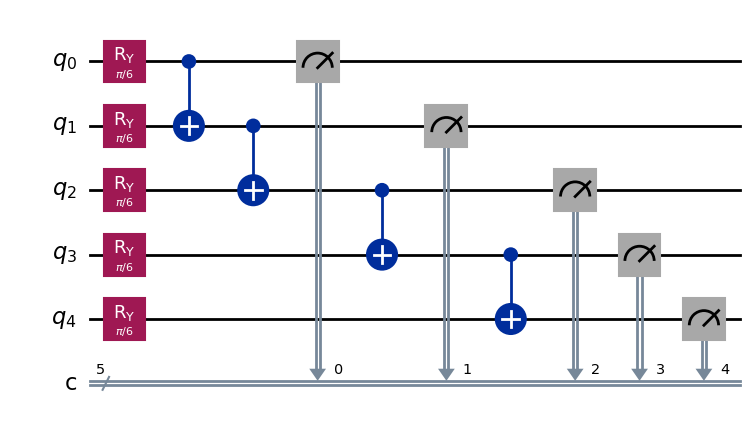

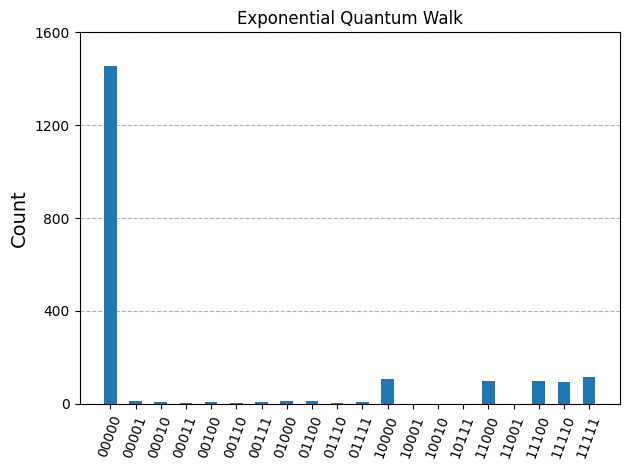

In [9]:
# Task 4: Modify the function to obtain Exponential Distribution

"""
In this task, we adapt the quantum Galton Box to generate an exponential-like
output distribution. This is done by introducing a fixed bias in the coin
operation using a controlled RY rotation with a small angle (e.g., π/6). 
This mimics a higher probability of 'falling' in one direction, leading to 
a right-skewed distribution similar to the exponential function.
"""

import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Function to create an exponential-biased quantum Galton Box circuit
def create_exponential_galton_box(layers=5, theta=np.pi/6):
    """
    Create a quantum Galton Box circuit with exponential bias.

    Parameters:
        layers (int): Number of layers in the board (equal to number of qubits)
        theta (float): Bias angle for RY rotation (π/6 gives a slight right bias)

    Returns:
        QuantumCircuit: The constructed biased quantum Galton circuit
    """
    n_qubits = layers
    qc = QuantumCircuit(n_qubits, n_qubits)

    # Apply biased RY coin toss at each layer
    for i in range(n_qubits):
        qc.ry(theta, i)  # Slight right bias

    # Apply entangling operations to mimic Galton board path splitting
    for i in range(n_qubits - 1):
        qc.cx(i, i + 1)

    # Measure all qubits
    qc.measure(range(n_qubits), range(n_qubits))
    return qc

# Function to simulate the circuit and get output distribution
def simulate_distribution(qc, shots=2048):
    """
    Run the quantum circuit and return the measurement counts.

    Parameters:
        qc (QuantumCircuit): Quantum circuit to simulate
        shots (int): Number of repetitions (shots)

    Returns:
        dict: Output histogram (bitstring -> frequency)
    """
    simulator = AerSimulator()
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled, shots=shots).result()
    return result.get_counts()

# Function to plot output as histogram
def plot_distribution(counts, title="Exponential Quantum Walk"):
    """
    Visualize output distribution as histogram.

    Parameters:
        counts (dict): Measurement outcome counts
        title (str): Plot title
    """
    plot_histogram(counts, title=title, bar_labels=False)
    plt.show()

# Run only if script is executed directly
if __name__ == "__main__":
    layers = 5
    theta = np.pi / 6  # Use smaller theta for stronger exponential shape
    qc = create_exponential_galton_box(layers=layers, theta=theta)
    qc.draw("mpl")
    counts = simulate_distribution(qc)
    plot_distribution(counts)

# This implementation uses a fixed RY rotation to introduce exponential bias in
# the quantum walk, without classical randomness. The result is expected to 
# produce a right-skewed (non-symmetric) distribution centered toward one end.


### Overview
This notebook focuses on reducing error in noisy quantum simulations using Qiskit’s noise-aware transpiler. By adapting the circuit layout to backend constraints, the fidelity of the output is improved.

### Goals
- Use backend noise information to transpile circuits more effectively.
- Evaluate how transpilation affects output accuracy.
- Compare statistical distances pre- and post-transpilation.



L1 (Manhattan) Distance between ideal and noisy distributions: 0.1504


/tmp/ipykernel_17936/179237942.py:142: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


FileNotFoundError: [Errno 2] No such file or directory: 'outputs/task11/l1_distance_plot.png'

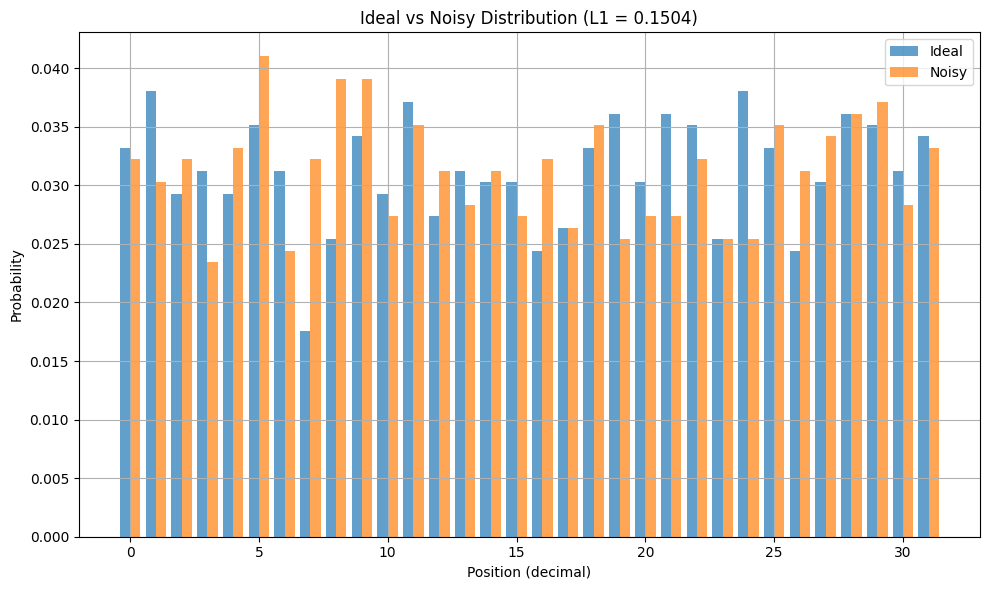

In [10]:
# === Imports ===
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, thermal_relaxation_error


# === Parameters ===
n_layers = 5
shots = 1024
save_dir = "outputs/task11"  # Adjust path as needed

# === Helper Function: Build the Galton Box Circuit ===
def build_quantum_galton_box(n_layers: int) -> QuantumCircuit:
    """
    Builds a quantum Galton box circuit with n_layers using Hadamard coins and controlled shifts.
    
    Parameters:
    - n_layers: Number of scattering layers (depth of the Galton board)
    
    Returns:
    - QuantumCircuit: the constructed quantum circuit
    """
    coin = QuantumRegister(1, name='coin')
    pos = QuantumRegister(n_layers, name='pos')
    c = ClassicalRegister(n_layers, name='c')
    qc = QuantumCircuit(coin, pos, c)
    
    for i in range(n_layers):
        qc.h(coin[0])
        qc.cx(coin[0], pos[i])
        if i < n_layers - 1:
            qc.swap(coin[0], pos[i])
    
    qc.measure(pos, c)
    return qc

# === Helper Function: Convert counts to integer positions ===
def convert_counts_to_distribution(counts: dict, n_layers: int, shots: int) -> np.ndarray:
    """
    Converts bitstring counts into a normalized position distribution.
    
    Parameters:
    - counts: Raw result from simulator
    - n_layers: Number of qubits in position register
    - shots: Number of total simulation shots
    
    Returns:
    - np.ndarray: Probability distribution indexed by position
    """
    dist = np.zeros(2**n_layers)
    for bitstring, count in counts.items():
        pos = int(bitstring, 2)
        dist[pos] += count
    return dist / shots

# === Create Simple Noise Model ===
def create_simple_noise_model(p_error: float = 0.02) -> NoiseModel:
    """
    Creates a basic depolarizing noise model to simulate realistic conditions.
    
    Parameters:
    - p_error: Probability of depolarizing error for single- and two-qubit gates
    
    Returns:
    - NoiseModel object
    """
    noise_model = NoiseModel()
    dep1 = depolarizing_error(p_error, 1)
    dep2 = depolarizing_error(p_error, 2)
    
    noise_model.add_all_qubit_quantum_error(dep1, ['h', 'x'])
    noise_model.add_all_qubit_quantum_error(dep2, ['cx'])
    
    return noise_model

# === Simulate Galton Box Circuit ===
def simulate_circuit(circuit: QuantumCircuit, simulator: AerSimulator, shots: int) -> dict:
    """
    Executes a quantum circuit on a given simulator backend.
    
    Parameters:
    - circuit: The quantum circuit to simulate
    - simulator: Qiskit AerSimulator backend
    - shots: Number of shots to execute
    
    Returns:
    - dict: Resulting measurement counts
    """
    transpiled = transpile(circuit, simulator)
    result = simulator.run(transpiled, shots=shots).result()
    return result.get_counts()

# === Compute L1 Distance ===
def compute_l1_distance(p: np.ndarray, q: np.ndarray) -> float:
    """
    Computes the classical L1 (Manhattan) distance between two probability distributions.
    
    Parameters:
    - p: Ideal distribution
    - q: Noisy distribution
    
    Returns:
    - float: L1 distance (sum of absolute differences)
    """
    return np.sum(np.abs(p - q))

# === Run Task ===
qc = build_quantum_galton_box(n_layers)

# Simulate ideal and noisy circuits
sim_ideal = AerSimulator()
sim_noisy = AerSimulator(noise_model=create_simple_noise_model())

counts_ideal = simulate_circuit(qc, sim_ideal, shots)
counts_noisy = simulate_circuit(qc, sim_noisy, shots)

# Convert to distributions
dist_ideal = convert_counts_to_distribution(counts_ideal, n_layers, shots)
dist_noisy = convert_counts_to_distribution(counts_noisy, n_layers, shots)

# === Compute L1 Distance ===
l1_distance = compute_l1_distance(dist_ideal, dist_noisy)
print(f"\nL1 (Manhattan) Distance between ideal and noisy distributions: {l1_distance:.4f}")

# === Plotting ===
positions = np.arange(len(dist_ideal))
plt.figure(figsize=(10,6))
plt.bar(positions - 0.2, dist_ideal, width=0.4, label='Ideal', alpha=0.7)
plt.bar(positions + 0.2, dist_noisy, width=0.4, label='Noisy', alpha=0.7)
plt.xlabel("Position (decimal)")
plt.ylabel("Probability")
plt.title(f"Ideal vs Noisy Distribution (L1 = {l1_distance:.4f})")
plt.legend()
plt.grid(True)

# Save and show plot
plt.tight_layout()
plt.savefig(f"{save_dir}/l1_distance_plot.png", dpi=300)
plt.show()


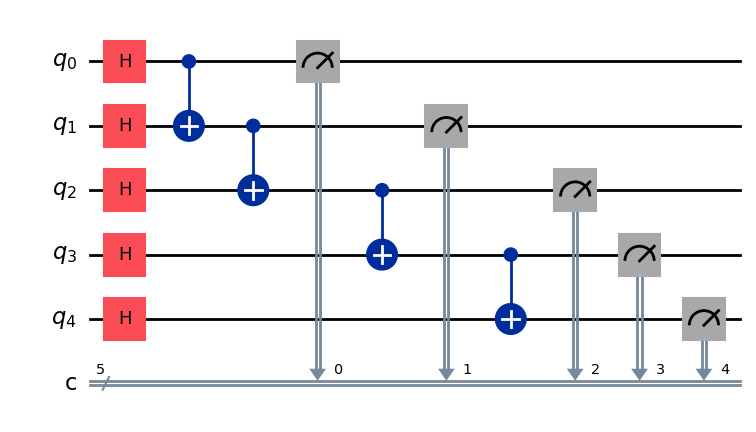

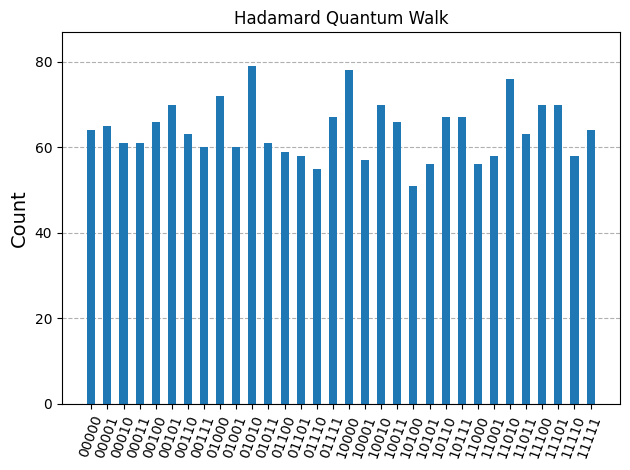

In [11]:
# task 3b
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, circuit_drawer
import os

#Create output directory
output_dir = "../outputs/Derivable3a/"
os.makedirs(output_dir, exist_ok=True)  # Create if doesn't exist

# For Jupyter notebooks magic line command
%matplotlib inline
def create_hadamard_galton_box(layers=5):
    """
    Constructs a quantum Galton board using Hadamard gates instead of biased RY rotations.

    Parameters:
        layers (int): Number of steps/layers in the Galton board.

    Returns:
        QuantumCircuit: The quantum circuit modeling a fair Galton box.
    """
    n_qubits = layers
    qc = QuantumCircuit(n_qubits, n_qubits)

    # Apply Hadamard "coin flip" to each qubit
    for i in range(n_qubits):
        qc.h(i)

    # Apply CNOT gates to model interference from pegs
    for i in range(n_qubits - 1):
        qc.cx(i, i + 1)

    # Measurement
    qc.measure(range(n_qubits), range(n_qubits))
    return qc

def simulate_distribution(qc, shots=2048):
    """
    Simulates the quantum circuit on QASM simulator and returns measurement counts.

    Parameters:
        qc (QuantumCircuit): Circuit to simulate.
        shots (int): Number of runs (shots).

    Returns:
        dict: Output measurement results.
    """
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=shots).result()
    return result.get_counts()

def plot_distribution(counts, title="Hadamard Quantum Walk"):
    """
    Plots the output histogram from the simulation.

    Parameters:
        counts (dict): Dictionary with bitstring frequencies.
        title (str): Title of the histogram plot.
    """
    plot_histogram(counts, title=title, bar_labels=False)
    plt.show()

if __name__ == "__main__":
    # Simulation Execution
    layers = 5  # Feel free to change this for deeper boards

    qc = create_hadamard_galton_box(layers)
    qc.draw("mpl")
    counts = simulate_distribution(qc)
    plot_distribution(counts)

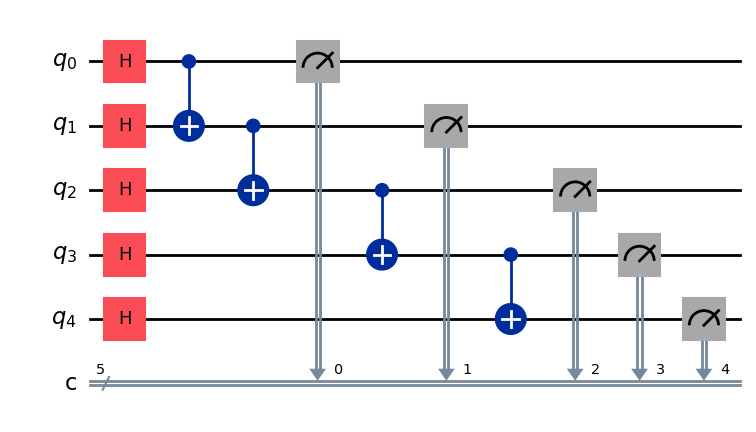

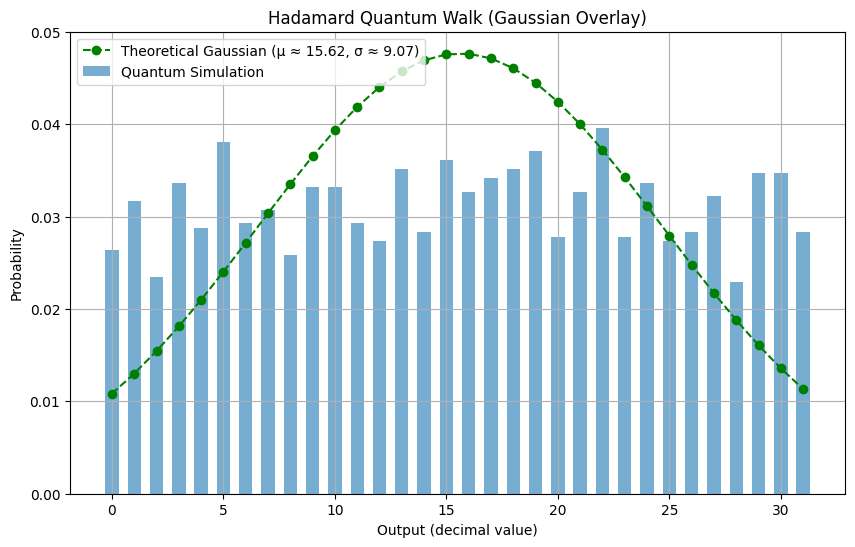

[✓] Plot saved to: /home/sarojray/Downloads/womanium2025/QuantumGaltonBox/results/hardamard_quantum_walk_plot.png


In [12]:
# Function for a symmetric Galton box using Hadamard gates
# -------------------------------------------------------

def create_hadamard_galton_box(layers=5):
    """
    Construct a quantum Galton box circuit using Hadamard gates (unbiased).
    
    Parameters:
        layers (int): Number of Hadamard layers / depth.
    
    Returns:
        QuantumCircuit: The Hadamard-based Galton box circuit.
    """
    qc = QuantumCircuit(layers, layers)

    # Apply Hadamard gates to initialize equal superposition
    for i in range(layers):
        qc.h(i)

    # Apply a cascade of CNOT gates to simulate branching
    for i in range(layers - 1):
        qc.cx(i, i + 1)

    # Measure all qubits
    qc.measure(range(layers), range(layers))
    return qc


# -------------------------------------
# Run the simulation and gather counts
# -------------------------------------

def simulate_distribution(qc, shots=2048):
    """
    Execute the circuit and gather measurement results.
    
    Parameters:
        qc (QuantumCircuit): The quantum circuit.
        shots (int): Number of measurement repetitions.
    
    Returns:
        dict: Raw bitstring counts.
    """
    simulator = AerSimulator()
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled, shots=shots).result()
    counts = result.get_counts()
    return counts


# ----------------------------------------------------------
# Overlay quantum histogram with Gaussian (normal) function
# ----------------------------------------------------------

def plot_with_gaussian_overlay(counts, title="Hadamard Quantum Walk (Gaussian Overlay)", save_path="hadamard_gaussian_overlay_plot.png"):
    """
    Plot the quantum histogram with a Gaussian overlay.
    
    Parameters:
        counts (dict): Measurement bitstring results.
        title (str): Plot title.
        save_path (str): File name to save the figure.
    """
    # Convert binary strings to integer values
    int_counts = {int(k, 2): v for k, v in counts.items()}
    max_bin = max(int_counts.keys())
    bins = np.arange(max_bin + 1)

    # Normalize quantum measurement results
    total = sum(int_counts.values())
    measured_probs = np.array([int_counts.get(i, 0) / total for i in bins])

    # Gaussian curve using same mean and variance
    mean = np.sum(bins * measured_probs)
    variance = np.sum((bins - mean)**2 * measured_probs)
    std = np.sqrt(variance)
    gaussian = norm.pdf(bins, loc=mean, scale=std)
    gaussian /= np.sum(gaussian)  # Normalize

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.bar(bins, measured_probs, width=0.6, label="Quantum Simulation", alpha=0.6)
    plt.plot(bins, gaussian, 'g--o', label=f"Theoretical Gaussian (μ ≈ {mean:.2f}, σ ≈ {std:.2f})")
    plt.xlabel("Output (decimal value)")
    plt.ylabel("Probability")
    plt.title(title)
    plt.legend()
    plt.grid(True)

    # Save and show
    save_path = "/home/sarojray/Downloads/womanium2025/QuantumGaltonBox/results/hardamard_quantum_walk_plot.png"
    plt.savefig(save_path, dpi=300)
    plt.show()
    print(f"[✓] Plot saved to: {save_path}")


# --------------------------
# Execute the full pipeline
# --------------------------

if __name__ == "__main__":
    layers = 5
    qc = create_hadamard_galton_box(layers=layers)
    qc.draw('mpl')
    counts = simulate_distribution(qc)
    plot_with_gaussian_overlay(counts)
